In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import requests
url = "https://data.bts.gov/views/3qgg-2u2a/rows.json?accessType=DOWNLOAD"

In [62]:
response = urllib.request.urlopen(url)
response.code

200

In [63]:
Proj = requests.get(url)

In [64]:
data = Proj.json()

In [66]:
Rows = data['data']

In [67]:
Column_names = [column['name'] for column in data['meta']['view']['columns']]

In [68]:
MP2 = pd.DataFrame(Rows, columns = Column_names)

In [69]:
#Printing the dataframe.
MP2

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,state,month,year,tax type,value,fips state,numeric month,note,id
0,row-5xmx~w7iz~5gvq,00000000-0000-0000-D29C-BF1953C02F4B,0,1696439439,None,1699566098,None,{ },Delaware,July,2023,motor fuel,None,10,7,None,10_2023_7
1,row-7xa9~imii~3fnj,00000000-0000-0000-2BFD-678882B53B29,0,1651624279,None,1699566098,None,{ },Idaho,January,2021,motor fuel,22273106.000000000000,16,1,None,16_2021_1
2,row-qr6t-atek.iwvf,00000000-0000-0000-13B2-2E7DB8BBA23A,0,1699566098,None,1699566098,None,{ },Alabama,August,2023,motor fuel,81898874.000000000000,1,8,None,1_2023_8
3,row-hhix_72jv~qz4i,00000000-0000-0000-CE76-17074EA39288,0,1651624279,None,1699566098,None,{ },Maine,February,2021,motor fuel,16310504.000000000000,23,2,None,23_2021_2
4,row-mwy4~4afh~2mh6,00000000-0000-0000-0ABE-1F5A8FF30491,0,1699566098,None,1699566098,None,{ },Alabama,September,2023,motor fuel,85792362.000000000000,1,9,None,1_2023_9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,row-dbcb.brau~pc99,00000000-0000-0000-53A2-B7CB86514CDD,0,1690902619,None,1699566098,None,{ },Wisconsin,May,2023,motor fuel,77753040.000000000000,55,5,None,55_2023_5
2750,row-wi7p_8thz_tg4u,00000000-0000-0000-361A-ABE4E33545A5,0,1688564389,None,1699566098,None,{ },Wyoming,April,2023,motor fuel,None,56,4,None,56_2023_4
2751,row-ezfa_vb5x-wz6g,00000000-0000-0000-D985-E1665B945F92,0,1696439439,None,1699566098,None,{ },Wyoming,July,2023,motor fuel,None,56,7,None,56_2023_7
2752,row-dfdy.583k~nhht,00000000-0000-0000-9368-A4D295AFB393,0,1693931486,None,1699566098,None,{ },Wyoming,June,2023,motor fuel,None,56,6,None,56_2023_6


In [53]:
#Deleting all the uneccessary columns.
del MP2['sid']
del MP2['note']
del MP2['value']
del MP2['meta']
del MP2['updated_meta']
del MP2['updated_at']
del MP2['created_meta']
del MP2['created_at']
del MP2['position']
del MP2['id']

In [20]:
#Viewing the dataframe after deleting the columns.
MP2

,state,month,year,tax type,fips state,numeric month
0,Delaware,July,2023,motor fuel,10,7
1,Idaho,January,2021,motor fuel,16,1
2,Maine,February,2021,motor fuel,23,2
3,Montana,April,2019,motor fuel,30,4
4,Nebraska,May,2021,motor fuel,31,5
...,...,...,...,...,...,...
2749,Wisconsin,May,2023,motor fuel,55,5
2750,Wyoming,April,2023,motor fuel,56,4
2751,Wyoming,July,2023,motor fuel,56,7
2752,Wyoming,June,2023,motor fuel,56,6


<BarContainer object of 2754 artists>

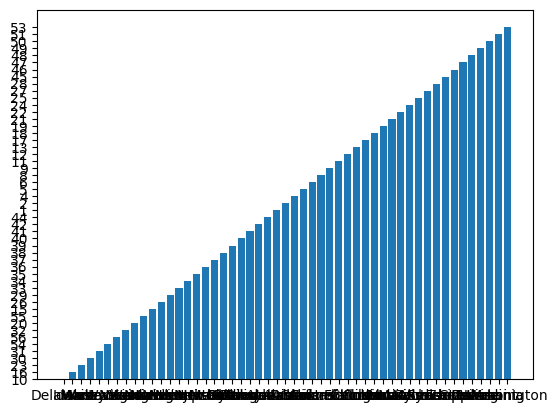

In [54]:
#Using state and fips state to create a bar plot.
plt.bar(MP2['state'],MP2['fips state'])

(array([459.,   0., 612.,   0.,   0., 459.,   0., 612.,   0., 612.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

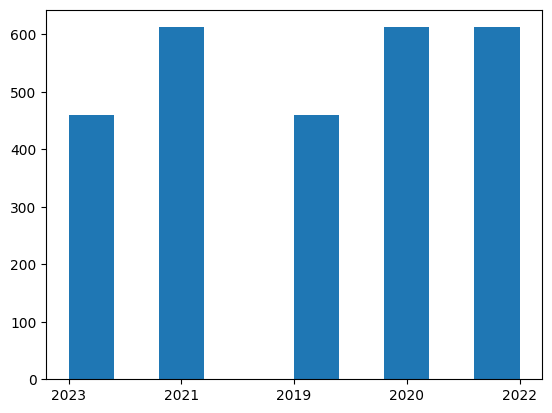

In [55]:
#Using year to create a histogram.
plt.hist(MP2['year'])

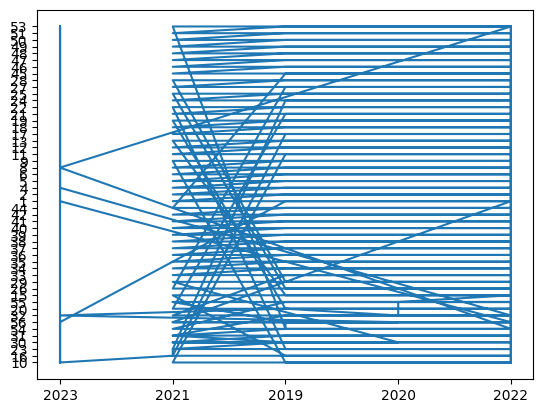

In [56]:
#Uisng year and fips state to create a plot.
plt.plot(MP2['year'],MP2['fips state'])

<Axes: xlabel='numeric month', ylabel='year'>

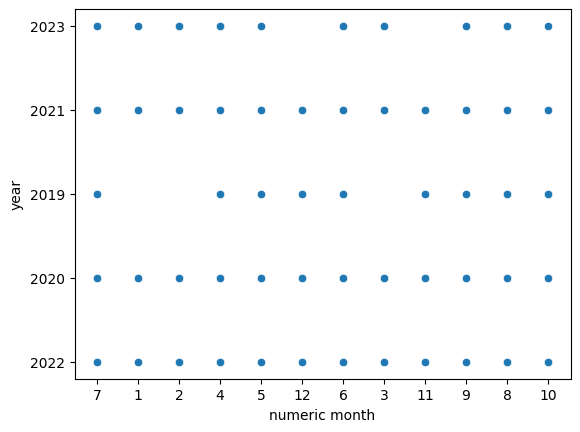

In [57]:
#Using numeric month and year to create a scatter plot.
sns.scatterplot(x=MP2['numeric month'],y=MP2['year'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   state          2754 non-null   object
 1   month          2754 non-null   object
 2   year           2754 non-null   object
 3   tax type       2754 non-null   object
 4   fips state     2754 non-null   object
 5   numeric month  2754 non-null   object
dtypes: object(6)
memory usage: 129.2+ KB


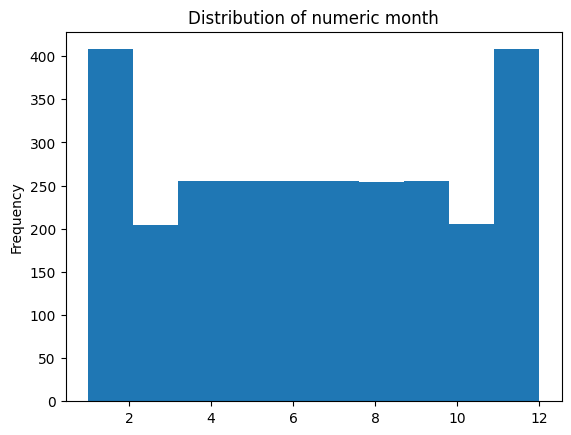

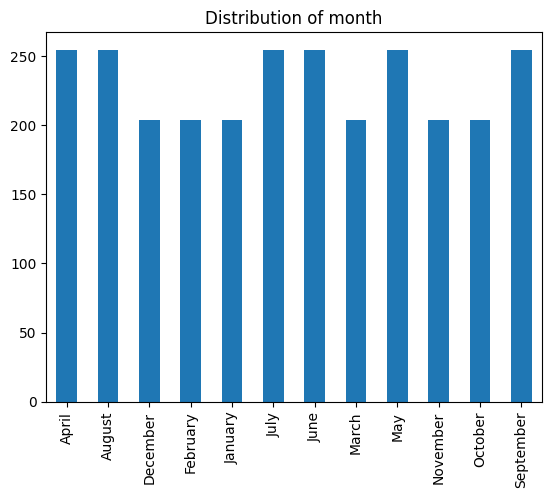

Sample Data:
          state     month  year    tax type fips state  numeric month
0      Delaware      July  2023  motor fuel         10              7
1         Idaho   January  2021  motor fuel         16              1
2         Maine  February  2021  motor fuel         23              2
3       Montana     April  2019  motor fuel         30              4
4      Nebraska       May  2021  motor fuel         31              5
...         ...       ...   ...         ...        ...            ...
2749  Wisconsin       May  2023  motor fuel         55              5
2750    Wyoming     April  2023  motor fuel         56              4
2751    Wyoming      July  2023  motor fuel         56              7
2752    Wyoming      June  2023  motor fuel         56              6
2753    Wyoming       May  2023  motor fuel         56              5

[2754 rows x 6 columns]

Summary Information:
None

Summary Statistics:
           state month  year    tax type fips state numeric month
count   

In [58]:
summary_info = MP2.info()

# Display summary statistics for numeric columns
summary_stats = MP2.describe()

# Visualize the distribution of 'numeric month'
MP2['numeric month'] = pd.to_numeric(MP2['numeric month'], errors='coerce')

# Visualize the distribution of 'numeric month'
MP2['numeric month'].plot(kind='hist', title='Distribution of numeric month')
plt.show()

# Visualize the distribution of 'month'
MP2['month'].value_counts().sort_index().plot(kind='bar', title='Distribution of month')
plt.show()

# Display the DataFrame
print("Sample Data:")
print(MP2)

# Display the summary information
print("\nSummary Information:")
print(summary_info)

# Display the summary statistics
print("\nSummary Statistics:")
print(summary_stats)

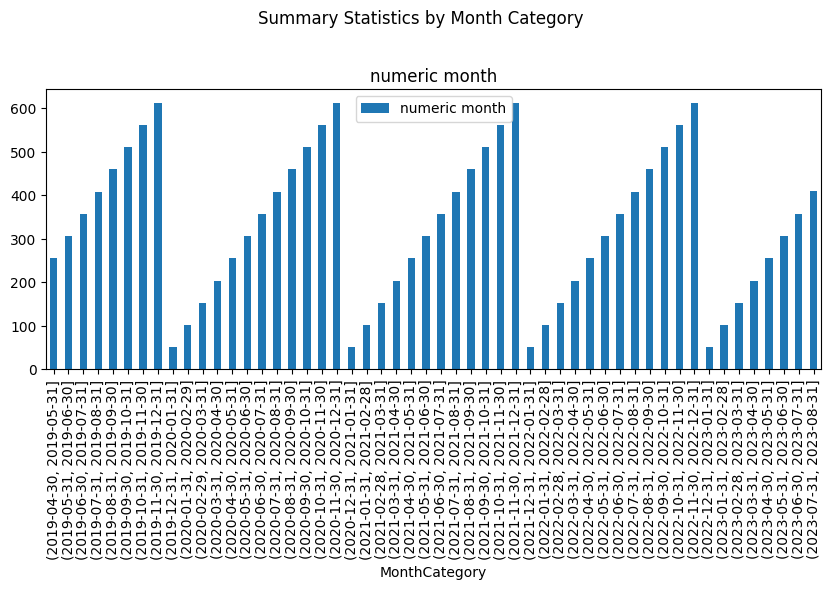


Summary Statistics by Month Category:
                                                                 fips state  \
MonthCategory                                                                 
(2019-04-30, 2019-05-31]  5655124568910111213151617181920212223242526272...   
(2019-05-31, 2019-06-30]  5655124568910111213151617181920212223242526272...   
(2019-06-30, 2019-07-31]  5620124568910111213151617181921222324252627282...   
(2019-07-31, 2019-08-31]  1245689101112131516171819202122232425262728293...   
(2019-08-31, 2019-09-30]  1245689101112131516171819202122232425262728293...   
(2019-09-30, 2019-10-31]  1245689101112131516171819202122232425262728293...   
(2019-10-31, 2019-11-30]  5655124568910111213151617181920212223242526272...   
(2019-11-30, 2019-12-31]  5456124568910111213151617181920212223242526272...   
(2019-12-31, 2020-01-31]  5632124568910111213151617181920212223242526272...   
(2020-01-31, 2020-02-29]  5612456891011121315161718192021222324252627282...   
(2020-02-29, 

In [59]:
# Convert 'Month' to datetime
MP2['Date'] = pd.to_datetime(MP2['year'].astype(str) + '-' + MP2['month'], errors='coerce')

# Bin records by month
MP2['MonthCategory'] = pd.cut(MP2['Date'], bins=pd.date_range(start=MP2['Date'].min(), end=MP2['Date'].max(), freq='M'))

# Summary statistics for 'fips state' and 'numeric month' by month category
summary_by_month = MP2.groupby('MonthCategory').agg({'fips state': 'sum', 'numeric month': 'sum'})

# Plot the results
summary_by_month.plot(kind='bar', subplots=True, layout=(2, 1), figsize=(10, 8), sharex=False)
plt.suptitle('Summary Statistics by Month Category')
plt.show()

# Display the summary statistics
print("\nSummary Statistics by Month Category:")
print(summary_by_month)

Data Types:
fips state       object
numeric month     int64
dtype: object


<ipython-input-39-608165e714a8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collection_1['fips state'] = pd.to_numeric(collection_1['fips state'], errors='coerce')
<ipython-input-39-608165e714a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collection_1['numeric month'] = pd.to_numeric(collection_1['numeric month'], errors='coerce')
<ipython-input-39-608165e714a8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

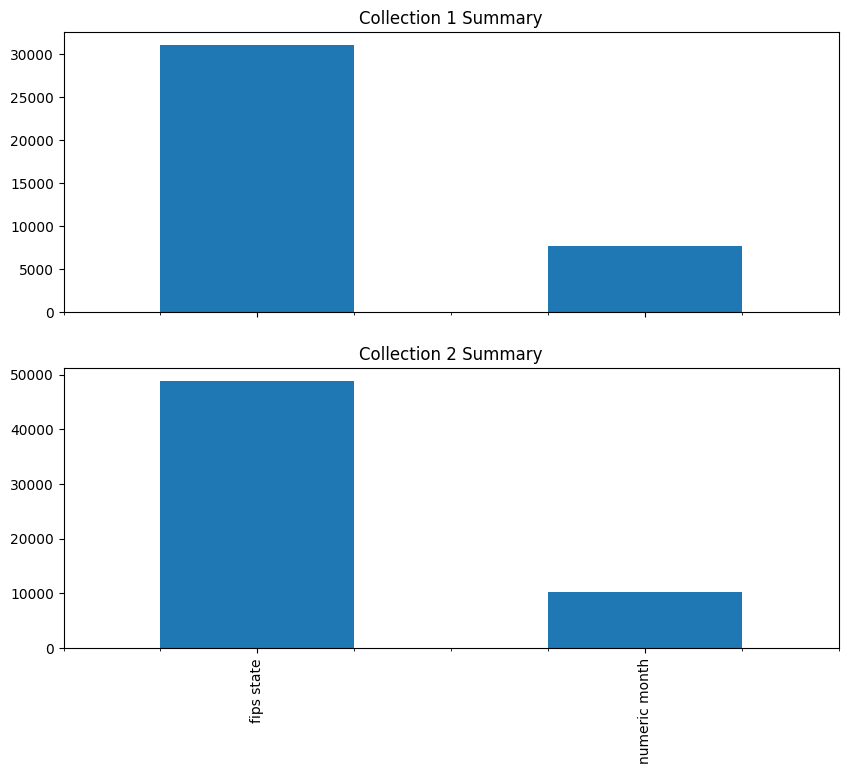


Collection 1 Summary:
fips state       31017
numeric month     7650
dtype: int64

Collection 2 Summary:
fips state       48741
numeric month    10253
dtype: int64


In [39]:
MP2['year'] = pd.to_numeric(MP2['year'], errors='coerce')

# Separate data into two collections based on 'year'
collection_1 = MP2[MP2['year'] < 2021]
collection_2 = MP2[MP2['year'] >= 2021]

# Check the data types of 'fips state' and 'numeric month'
print("Data Types:")
print(collection_1[['fips state', 'numeric month']].dtypes)

# Convert 'fips state' and 'numeric month' to numeric type
collection_1['fips state'] = pd.to_numeric(collection_1['fips state'], errors='coerce')
collection_1['numeric month'] = pd.to_numeric(collection_1['numeric month'], errors='coerce')

collection_2['fips state'] = pd.to_numeric(collection_2['fips state'], errors='coerce')
collection_2['numeric month'] = pd.to_numeric(collection_2['numeric month'], errors='coerce')

# Compare summary statistics for 'fips state' and 'numeric month' for the two collections
summary_collection_1 = collection_1[['fips state', 'numeric month']].agg('sum')
summary_collection_2 = collection_2[['fips state', 'numeric month']].agg('sum')

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
summary_collection_1.plot(kind='bar', ax=axes[0], title='Collection 1 Summary')
summary_collection_2.plot(kind='bar', ax=axes[1], title='Collection 2 Summary')
plt.show()

# Display the summary statistics
print("\nCollection 1 Summary:")
print(summary_collection_1)

print("\nCollection 2 Summary:")
print(summary_collection_2)